In [179]:
import numpy as np
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from parse_filenames import parse_filenames
from scipy import stats
import pickle

In [164]:
path = Path.home() / 'Desktop' / 'disk2' / 'grand_average_lfps'

# 1) Parsing filenames of averaged LFPs

In [165]:
parsed_df = parse_filenames(path)
parsed_df.head()

,sessionID,area,condition,running,flashesAveragedOver,micronsElectrodeDepth,filename
0,794812542,VISpm,toWhite,True,2,992.0,sessionID_794812542_area_VISpm_condition_toWhi...
1,742951821,VISp,toWhite,True,2,NaN,sessionID_742951821_area_VISp_condition_toWhit...
2,771990200,VISp,toBlack,True,14,1039.0,sessionID_771990200_area_VISp_condition_toBlac...
3,797828357,VISp,toWhite,True,9,1046.0,sessionID_797828357_area_VISp_condition_toWhit...
4,797828357,VISp,toWhite,False,66,1046.0,sessionID_797828357_area_VISp_condition_toWhit...


In [166]:
# Deleting rows without 8 conditions

for sid in parsed_df.sessionID.unique():
    if len(parsed_df[parsed_df.sessionID==sid]) != 8:
        parsed_df = parsed_df.drop(parsed_df[parsed_df.sessionID==sid].index)

In [167]:
conditions = [('VISpm', 'toWhite', True), ('VISpm', 'toBlack', True), ('VISpm', 'toWhite', False), ('VISpm', 'toBlack', False),
             ('VISp', 'toWhite', True), ('VISp', 'toBlack', True), ('VISp', 'toWhite', False), ('VISp', 'toBlack', False)]

In [168]:
for condition in conditions:
    selected_df = parsed_df[(parsed_df.area==condition[0]) & (parsed_df.condition==condition[1]) & (parsed_df.running==condition[2])]
    print(condition, len(selected_df))

('VISpm', 'toWhite', True) 19
('VISpm', 'toBlack', True) 19
('VISpm', 'toWhite', False) 19
('VISpm', 'toBlack', False) 19
('VISp', 'toWhite', True) 19
('VISp', 'toBlack', True) 19
('VISp', 'toWhite', False) 19
('VISp', 'toBlack', False) 19


# 2) Calculating session averages (median + IQR)

In [169]:
def get_iqr(data):
    iqrs = []

    for t in range(data.shape[1]):
        iqr = stats.iqr(data[:,t])
        iqrs.append(iqr)
        
    return np.array(iqrs)

In [170]:
parsed_df['t'] = ''
parsed_df['median'] = ''
parsed_df['iqr'] = ''

In [178]:
# with open(Path.home() / 'Desktop' / 'disk2' / 'lfp_ts_parsed_df.pkl', 'rb') as f: parsed_df = pickle.load(f)

In [171]:
for condition in conditions:
    selected_df = parsed_df[(parsed_df.area==condition[0]) & (parsed_df.condition==condition[1]) & (parsed_df.running==condition[2])]
    for cols in selected_df.iterrows():
        t, lfp_arr = np.load(path / cols[1].filename, allow_pickle=True)
        # Saving time data, median time series and iqr (variability measure) time series for eahc condition-session entry
        for i in selected_df.index: 
            parsed_df.at[i, 't'] = t.data
            parsed_df.at[i, 'median'] = np.median(lfp_arr, axis=0)
            parsed_df.at[i, 'iqr'] = get_iqr(lfp_arr)

In [172]:
parsed_df

,sessionID,area,condition,running,flashesAveragedOver,micronsElectrodeDepth,filename,t,median,iqr
1,742951821,VISp,toWhite,True,2,NaN,sessionID_742951821_area_VISp_condition_toWhit...,"[-1.0, -0.9991997866097626, -0.998399573219525...","[1.872e-05, 1.7549999e-05, 1.3455e-05, 2.145e-...","[5.5964999205571075e-05, 6.62999987071089e-05,..."
2,771990200,VISp,toBlack,True,14,1039.0,sessionID_771990200_area_VISp_condition_toBlac...,"[-1.0, -0.9991997866097626, -0.998399573219525...","[-2.808e-05, -2.808e-05, -2.808e-05, -2.808e-0...","[1.701374958429369e-05, 1.257749977412459e-05,..."
3,797828357,VISp,toWhite,True,9,1046.0,sessionID_797828357_area_VISp_condition_toWhit...,"[-1.0, -0.9991997866097626, -0.998399573219525...","[1.872e-05, 1.7549999e-05, 1.3455e-05, 2.145e-...","[5.5964999205571075e-05, 6.62999987071089e-05,..."
4,797828357,VISp,toWhite,False,66,1046.0,sessionID_797828357_area_VISp_condition_toWhit...,"[-1.0, -0.9991997866097626, -0.998399573219525...","[-2.4179999e-05, -2.106e-05, -1.443e-05, -1.01...","[9.145500007434748e-05, 7.507499685743824e-05,..."
5,771990200,VISpm,toWhite,False,63,985.0,sessionID_771990200_area_VISpm_condition_toWhi...,"[-1.0, -0.9991997866097626, -0.998399573219525...","[-2.0475e-06, -8.6775e-06, -5.9475e-06, 2.2425...","[0.0001316737498200382, 0.00012060750214004656..."
...,...,...,...,...,...,...,...,...,...,...
150,715093703,VISp,toWhite,False,14,NaN,sessionID_715093703_area_VISp_condition_toWhit...,"[-1.0, -0.9991997866097626, -0.998399573219525...","[-2.4179999e-05, -2.106e-05, -1.443e-05, -1.01...","[9.145500007434748e-05, 7.507499685743824e-05,..."
151,771160300,VISp,toWhite,True,29,1135.0,sessionID_771160300_area_VISp_condition_toWhit...,"[-1.0, -0.9991997866097626, -0.998399573219525...","[1.872e-05, 1.7549999e-05, 1.3455e-05, 2.145e-...","[5.5964999205571075e-05, 6.62999987071089e-05,..."
152,719161530,VISp,toWhite,False,17,762.0,sessionID_719161530_area_VISp_condition_toWhit...,"[-1.0, -0.9991997866097626, -0.998399573219525...","[-2.4179999e-05, -2.106e-05, -1.443e-05, -1.01...","[9.145500007434748e-05, 7.507499685743824e-05,..."
153,761418226,VISpm,toBlack,False,74,1165.0,sessionID_761418226_area_VISpm_condition_toBla...,"[-1.0, -0.9991997866097626, -0.998399573219525...","[1.17e-06, 2.8274999e-06, 3.12e-06, -5.8499995...","[0.00013581749954028055, 0.0001460062503610970..."


In [182]:
# with open(Path.home() / 'Desktop' / 'disk2' / 'lfp_ts_parsed_df.pkl', "wb") as f:
#     pickle.dump(parsed_df, f)

# 3) Calculating weighted average

In [173]:
weighted_average_lfps = []

for condition in conditions:
    selected_df = parsed_df[(parsed_df.area==condition[0]) & (parsed_df.condition==condition[1]) & (parsed_df.running==condition[2])]
    N = selected_df.flashesAveragedOver.sum()
    
    collected_weighted_median_ts = []
    collected_weighted_iqr_ts = []
    
    for cols in selected_df.iterrows():
        t, median_ts, iqr_ts = cols[1]['t'], cols[1]['median'], cols[1]['iqr']
        collected_weighted_median_ts.append((cols[1].flashesAveragedOver / N) * median_ts)
        collected_weighted_iqr_ts.append((cols[1].flashesAveragedOver / N) * iqr_ts)
        # collected_lfp_arrs.append(lfp_arr * cols[1].flashesAveragedOver) # multiplied by weightings
        # collected_lfp_arrs.append(lfp_arr)
    collected_weighted_median_ts = np.array(collected_weighted_median_ts)
    collected_weighted_iqr_ts = np.array(collected_weighted_iqr_ts)
    
    current_condition_weighted_average = collected_weighted_median_ts.sum(axis=0)
    current_condition_weighted_iqr = collected_weighted_iqr_ts.sum(axis=0)
    
    weighted_average_lfps.append([t, current_condition_weighted_average, current_condition_weighted_iqr])

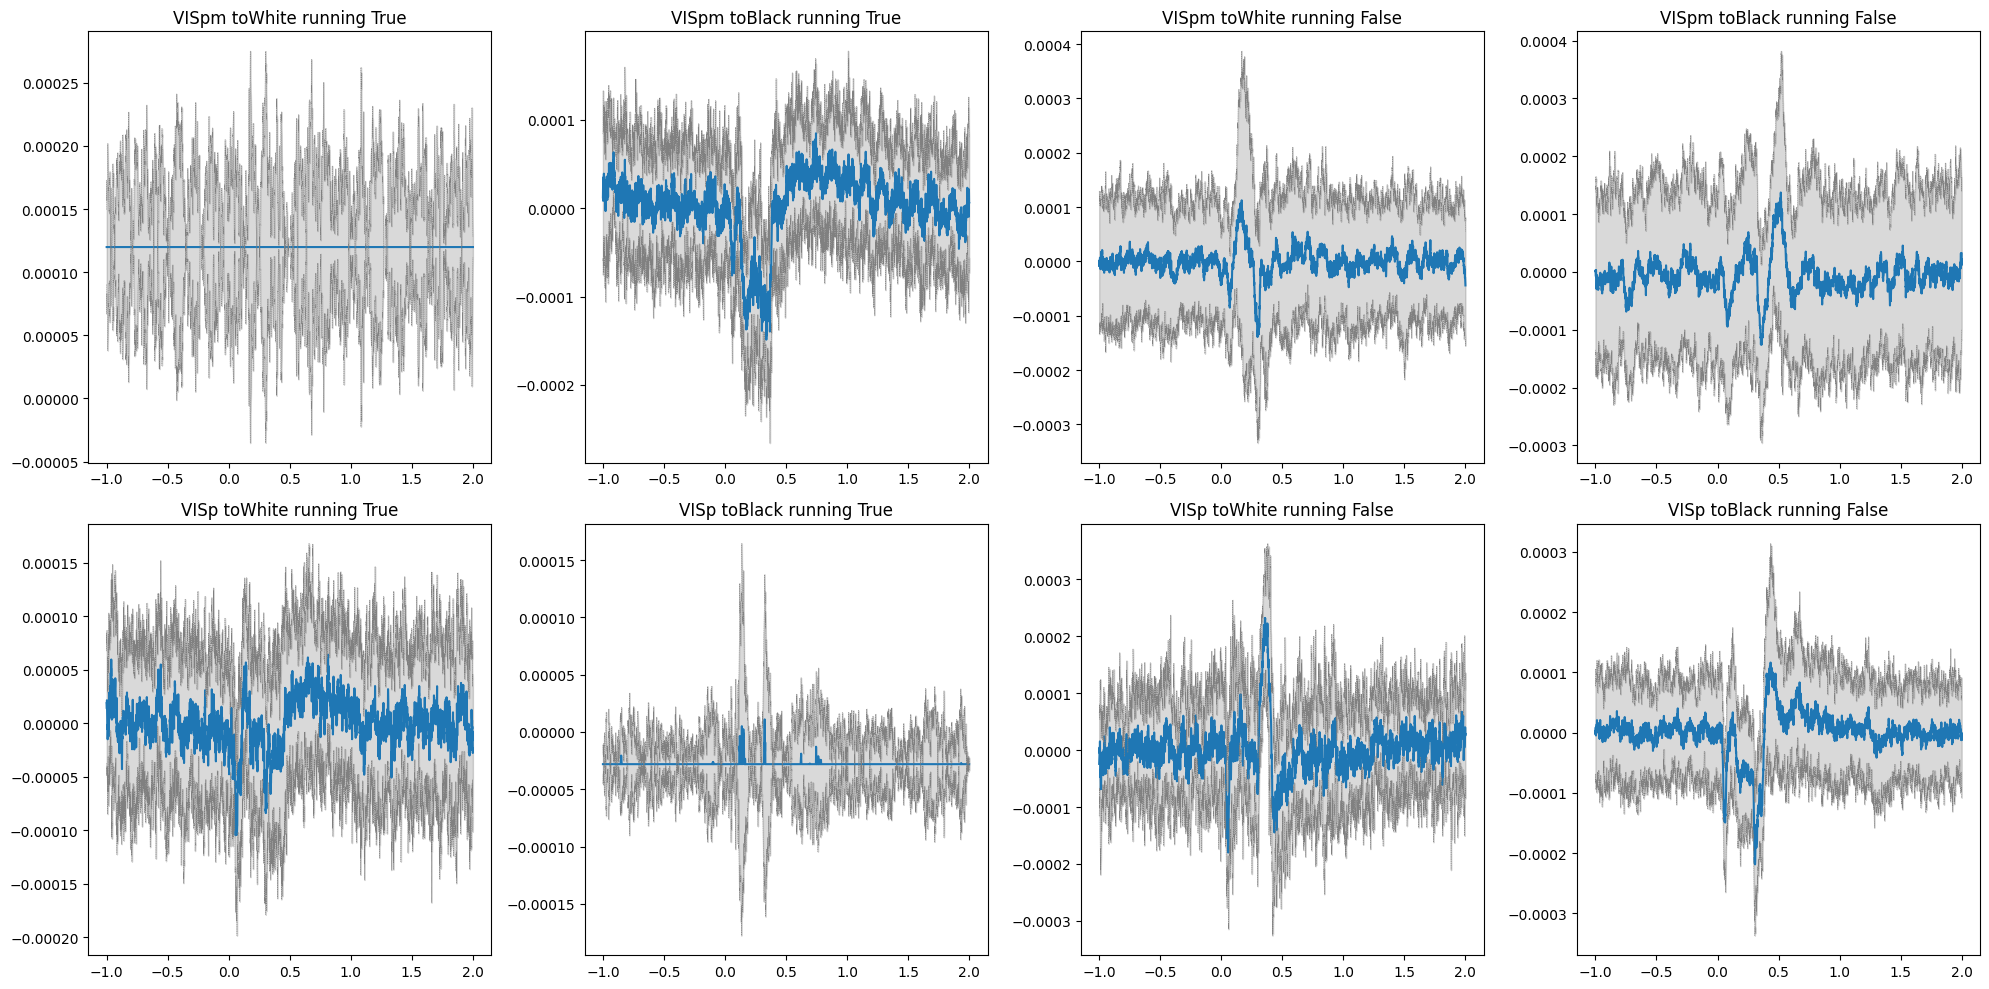

In [185]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

for i in range(4):
    ax[0][i].plot(t,weighted_average_lfps[i][1])
    lower = weighted_average_lfps[i][1] - weighted_average_lfps[i][2]
    upper = weighted_average_lfps[i][1] + weighted_average_lfps[i][2]
    ax[0][i].plot(t,lower,linestyle='--',linewidth=0.3, color='gray')
    ax[0][i].plot(t,upper,linestyle='--',linewidth=0.3, color='gray')
    ax[0][i].fill_between(t,upper,lower, color='k', alpha=0.15)
    ax[0][i].set_title(f'{conditions[i][0]} {conditions[i][1]} running {conditions[i][2]}')
    
for i in range(4):
    ax[1][i].plot(t,weighted_average_lfps[4+i][1])
    lower = weighted_average_lfps[4+i][1] - weighted_average_lfps[4+i][2]
    upper = weighted_average_lfps[4+i][1] + weighted_average_lfps[4+i][2]
    ax[1][i].plot(t,lower,linestyle='--',linewidth=0.3, color='gray')
    ax[1][i].plot(t,upper,linestyle='--',linewidth=0.3, color='gray')
    ax[1][i].fill_between(t,upper,lower, color='k', alpha=0.15)
    ax[1][i].set_title(f'{conditions[4+i][0]} {conditions[4+i][1]} running {conditions[4+i][2]}')
    
plt.tight_layout()
plt.show()

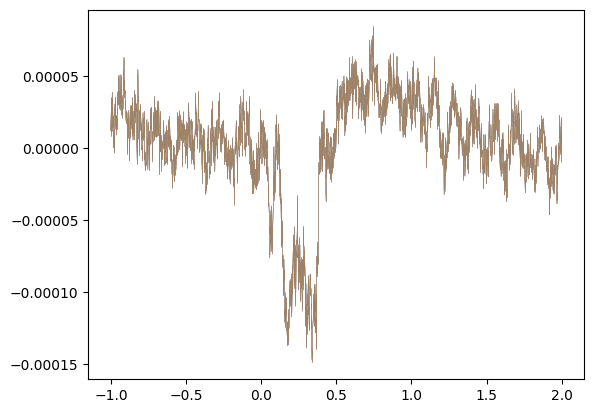

In [176]:
condition = conditions[1]
selected_df = parsed_df[(parsed_df.area==condition[0]) & (parsed_df.condition==condition[1]) & (parsed_df.running==condition[2])]
for cols in selected_df.iterrows():
    plt.plot(cols[1]['t'], cols[1]['median'],alpha=0.5,linewidth=0.1)
plt.show()